In [1]:
import argparse
import sys
from multiprocessing import cpu_count
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import datasets
import models
import torch_burn as tb
import utils

In [2]:
CHECKPOINT_DIR = Path('checkpoint/BaselineMLP')
CHECKPOINT_DIR.mkdir(parents=True, exist_ok=True)

tb.seed_everything(0)

DATA_FILEPATH = '/data/hp/pth_nostd/C2-T18-win48-hop1.pth'

In [3]:
train_ds, valid_ds, datainfo = datasets.make_dataset(DATA_FILEPATH)

In [4]:
len(train_ds), len(valid_ds)

(177937, 176476)

In [8]:
model = models.BaselineFC3(6*48, 3).cuda()

In [9]:
criterion = nn.MSELoss().cuda()

In [10]:
optimizer = torch.optim.Adam(model.parameters())

In [11]:
metrics = [tb.metrics.ModuleMetric(criterion, 'loss'),
           utils.HPMetric('hp_metric'),
           utils.HPSignalHistory(CHECKPOINT_DIR / 'sample' / '{epoch:04d}.npy', 'hp_signal')]

In [12]:
callbacks = [tb.callbacks.EarlyStopping(metrics[0])]

In [13]:
trainer = tb.Trainer(model, optimizer, metrics, callbacks, ncols=100)

In [14]:
trainer.fit(train_ds, valid_ds, start_epoch=1, num_epochs=40, batch_size=256, pin_memory=True)

[0002/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   4.793352
 - Pitch        :   2.048217
 - Roll         :   1.332587
 - RMS          :   3.106295
 - 99% Tile     :  15.317942
Save output signals into checkpoint/BaselineMLP/sample/0001.npy


[0003/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   5.512821
 - Pitch        :   1.683215
 - Roll         :   1.428494
 - RMS          :   3.428557
 - 99% Tile     :  15.853752
Save output signals into checkpoint/BaselineMLP/sample/0002.npy


[0003/0040] Validation: 100%|███████████████████| 690/690 [00:01<00:00, 625.41it/s, val_loss 0.0048]


                  validation
 - Yaw          :   3.266473
 - Pitch        :   3.410199
 - Roll         :   1.181950
 - RMS          :   2.810475
 - 99% Tile     :  13.777200
Save output signals into checkpoint/BaselineMLP/sample/0003.npy


[0005/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   4.724964
 - Pitch        :   1.786192
 - Roll         :   1.168365
 - RMS          :   2.993373
 - 99% Tile     :  16.119561
Save output signals into checkpoint/BaselineMLP/sample/0004.npy


[0006/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   4.458461
 - Pitch        :   1.903522
 - Roll         :   1.205288
 - RMS          :   2.884094
 - 99% Tile     :  15.080566
Save output signals into checkpoint/BaselineMLP/sample/0005.npy


[0007/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   3.415146
 - Pitch        :   2.056243
 - Roll         :   1.275206
 - RMS          :   2.416438
 - 99% Tile     :  13.582166
Save output signals into checkpoint/BaselineMLP/sample/0006.npy


[0008/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   4.096692
 - Pitch        :   2.974479
 - Roll         :   1.120051
 - RMS          :   2.993600
 - 99% Tile     :  15.699711
Save output signals into checkpoint/BaselineMLP/sample/0007.npy


[0009/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   3.333060
 - Pitch        :   1.859540
 - Roll         :   0.995491
 - RMS          :   2.277292
 - 99% Tile     :  13.709199
Save output signals into checkpoint/BaselineMLP/sample/0008.npy


[0010/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   3.758918
 - Pitch        :   2.320964
 - Roll         :   1.202160
 - RMS          :   2.643327
 - 99% Tile     :  14.177776
Save output signals into checkpoint/BaselineMLP/sample/0009.npy


[0011/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   3.599373
 - Pitch        :   2.278895
 - Roll         :   1.319173
 - RMS          :   2.574818
 - 99% Tile     :  14.482937
Save output signals into checkpoint/BaselineMLP/sample/0010.npy


[0012/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 3 epochs
                  validation
 - Yaw          :   4.715231
 - Pitch        :   2.846344
 - Roll         :   1.303787
 - RMS          :   3.267769
 - 99% Tile     :  17.314179
Save output signals into checkpoint/BaselineMLP/sample/0011.npy


[0013/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 4 epochs
                  validation
 - Yaw          :   3.991129
 - Pitch        :   2.344035
 - Roll         :   1.277865
 - RMS          :   2.772276
 - 99% Tile     :  14.579556
Save output signals into checkpoint/BaselineMLP/sample/0012.npy


[0014/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 5 epochs
                  validation
 - Yaw          :   3.552735
 - Pitch        :   1.871928
 - Roll         :   1.172289
 - RMS          :   2.415250
 - 99% Tile     :  13.831770
Save output signals into checkpoint/BaselineMLP/sample/0013.npy


[0015/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 6 epochs
                  validation
 - Yaw          :   4.689880
 - Pitch        :   2.638496
 - Roll         :   1.487989
 - RMS          :   3.223391
 - 99% Tile     :  14.546557
Save output signals into checkpoint/BaselineMLP/sample/0014.npy


[0016/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 7 epochs
                  validation
 - Yaw          :   4.299376
 - Pitch        :   2.053136
 - Roll         :   1.150496
 - RMS          :   2.829820
 - 99% Tile     :  15.367745
Save output signals into checkpoint/BaselineMLP/sample/0015.npy


[0017/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 8 epochs
                  validation
 - Yaw          :   3.876805
 - Pitch        :   2.116483
 - Roll         :   1.209545
 - RMS          :   2.643994
 - 99% Tile     :  15.236655
Save output signals into checkpoint/BaselineMLP/sample/0016.npy


[0018/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 9 epochs
                  validation
 - Yaw          :   3.234882
 - Pitch        :   2.387143
 - Roll         :   1.230295
 - RMS          :   2.427382
 - 99% Tile     :  14.230755
Save output signals into checkpoint/BaselineMLP/sample/0017.npy


[0018/0040] Validation: 100%|███████████████████| 690/690 [00:01<00:00, 669.90it/s, val_loss 0.0049]

val_loss is not improved for 10 epochs
Stop training because val_loss did not improved for 10 epochs
                  validation
 - Yaw          :   3.908059
 - Pitch        :   2.272346
 - Roll         :   1.104926
 - RMS          :   2.686841
 - 99% Tile     :  15.506407
Save output signals into checkpoint/BaselineMLP/sample/0018.npy


# 그래프 그리기

In [3]:
graph_file = 'checkpoint/BaselineMLP/sample/0008.npy'

In [4]:
graph_data = np.load(graph_file)

In [5]:
yaw_gt, pitch_gt, roll_gt, yaw, pitch, roll = graph_data

In [6]:
title = 'BaselineMLP'
GRAPH_FILEPATH = CHECKPOINT_DIR / f'graph-{Path(graph_file).stem}.png'
s = 1500
t = 2100

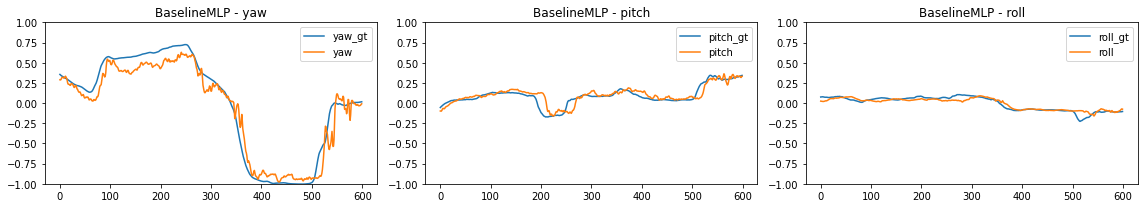

In [7]:
plt.figure(figsize=(16, 3))

plt.subplot(1, 3, 1)
plt.plot(yaw_gt[s:t])
plt.plot(yaw[s:t])
plt.legend(['yaw_gt', 'yaw'])
plt.title(title + ' - yaw')
plt.ylim(-1, 1)

plt.subplot(1, 3, 2)
plt.plot(pitch_gt[s:t])
plt.plot(pitch[s:t])
plt.legend(['pitch_gt', 'pitch'])
plt.title(title + ' - pitch')
plt.ylim(-1, 1)

plt.subplot(1, 3, 3)
plt.plot(roll_gt[s:t])
plt.plot(roll[s:t])
plt.legend(['roll_gt', 'roll'])
plt.title(title + ' - roll')
plt.ylim(-1, 1)

plt.tight_layout()
plt.savefig(GRAPH_FILEPATH)
plt.show()